In [1]:
import stlearn as st
import scanpy as sc
from pathlib import Path
st.settings.set_figure_params(dpi=180)

C:\Users\alon2\anaconda3\envs\FPST\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\alon2\anaconda3\envs\FPST\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import numpy as np
import pandas as pd

## Read Visium 10x data

In [3]:
AnnData = st.Read10X("data\\\V1_Human_Lymph_Node\\", count_file = "filtered_feature_bc_matrix.h5", load_images = True)

C:\Users\alon2\anaconda3\envs\FPST\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
df = pd.DataFrame(AnnData.X.toarray())

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,36591,36592,36593,36594,36595,36596,36597,36598,36599,36600
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing

In [25]:
st.pp.filter_genes(AnnData, min_cells=3)
st.pp.normalize_total(AnnData)
st.pp.log1p(AnnData)
st.pp.scale(AnnData)

filtered out 14190 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)


Normalization step is finished in adata.X


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Log transformation step is finished in adata.X
Scale step is finished in adata.X


## Exec PCA

In [27]:
# Run PCA
st.em.run_pca(AnnData,n_comps=50,random_state=0)
# Tiling image
st.pp.tiling(AnnData,out_path="tiling",crop_size = 40)
# Using Deep Learning to extract feature
st.pp.extract_feature(AnnData)
# Apply stSME spatial-PCA option
st.spatial.morphology.adjust(AnnData,use_data="X_pca",radius=50,method="mean")
st.pp.neighbors(AnnData,n_neighbors=25,use_rep='X_pca_morphology',random_state=0)
st.tl.clustering.louvain(AnnData,random_state=0)

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=50
    finished (0:00:02)


PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Tiling image: 100%|███████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Extract feature:   2%|█▉                                                                           [ time left: 03:48 ]C:\Users\alon2\anaconda3\envs\stlearn\lib\site-packages\stlearn\image_preprocessing\feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
Extract feature: 100%|████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|█████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
computing neighbors


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
running Louvain clustering
    using the "louvain" package of Traag (2017)


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


## Plot

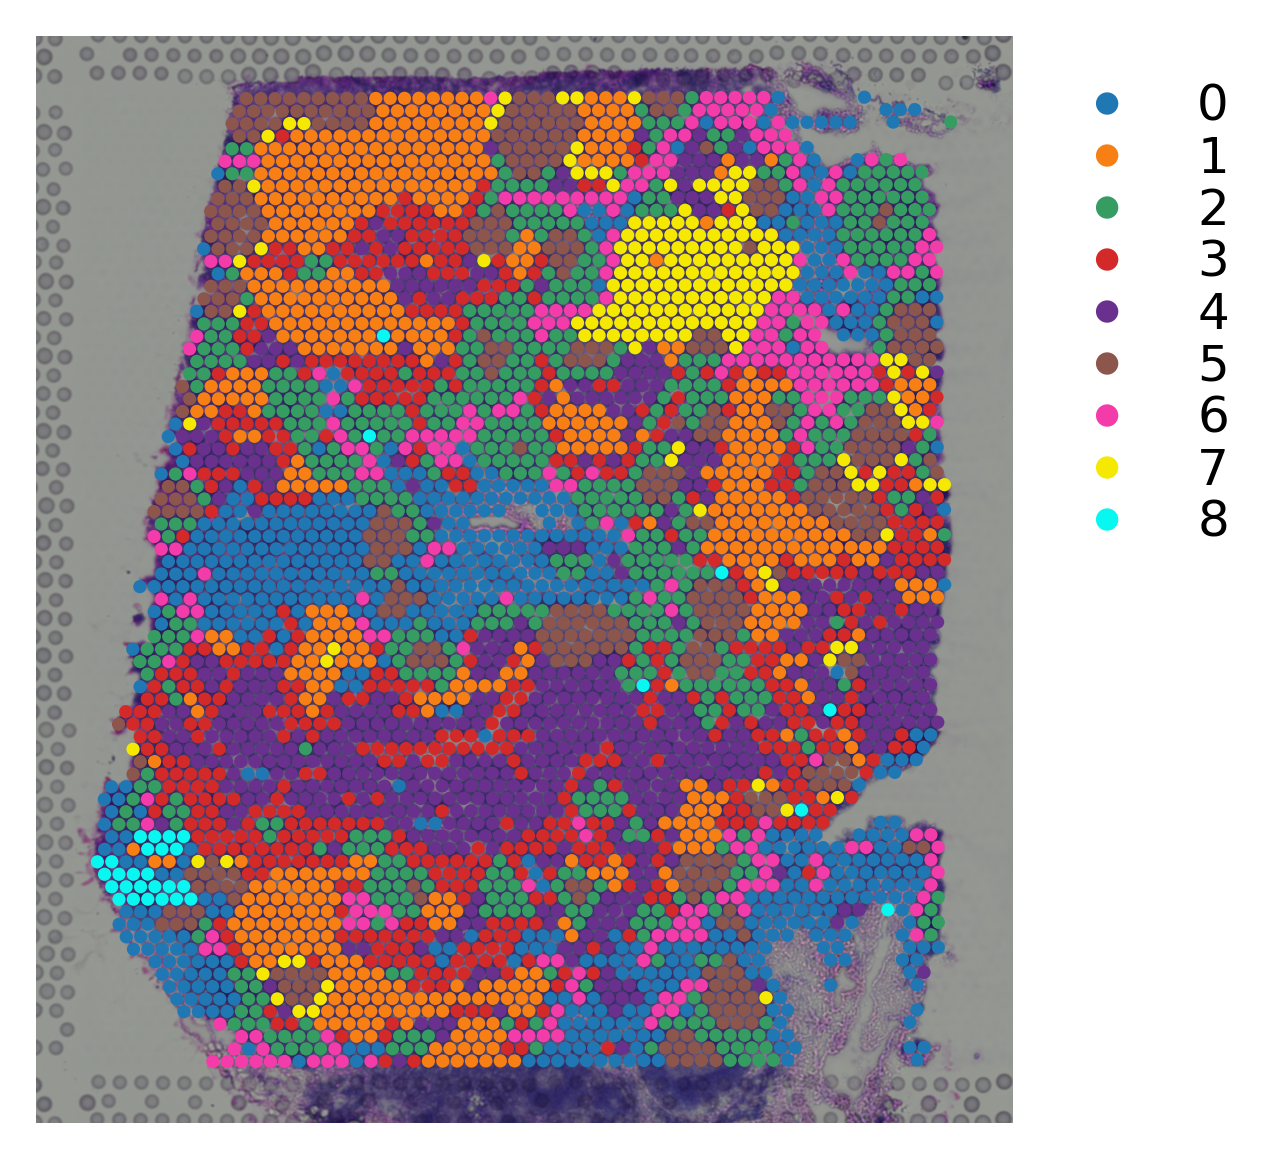

In [28]:
st.pl.cluster_plot(AnnData,use_label="louvain",image_alpha=1,size=7)

In [36]:
# Run PCA
# st.em.run_umap(AnnData,min_dist=10,spread=1)
# Tiling image
st.pp.tiling(AnnData,out_path="tiling",crop_size = 40)
# Using Deep Learning to extract feature
st.pp.extract_feature(AnnData)
# Apply stSME spatial-PCA option
st.spatial.morphology.adjust(AnnData,use_data="X_umap",radius=50,method="mean")
st.pp.neighbors(AnnData,n_neighbors=25,use_rep='X_pca_morphology',random_state=0)
st.tl.clustering.louvain(AnnData,random_state=0)

Tiling image: 100%|███████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Extract feature:   2%|█▊                                                                           [ time left: 03:00 ]C:\Users\alon2\anaconda3\envs\stlearn\lib\site-packages\stlearn\image_preprocessing\feature_extractor.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df[spot] = features
Extract feature: 100%|████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Adjusting data: 100%|█████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]
computing neighbors


The data adjusted by morphology is added to adata.obsm['X_umap_morphology']


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


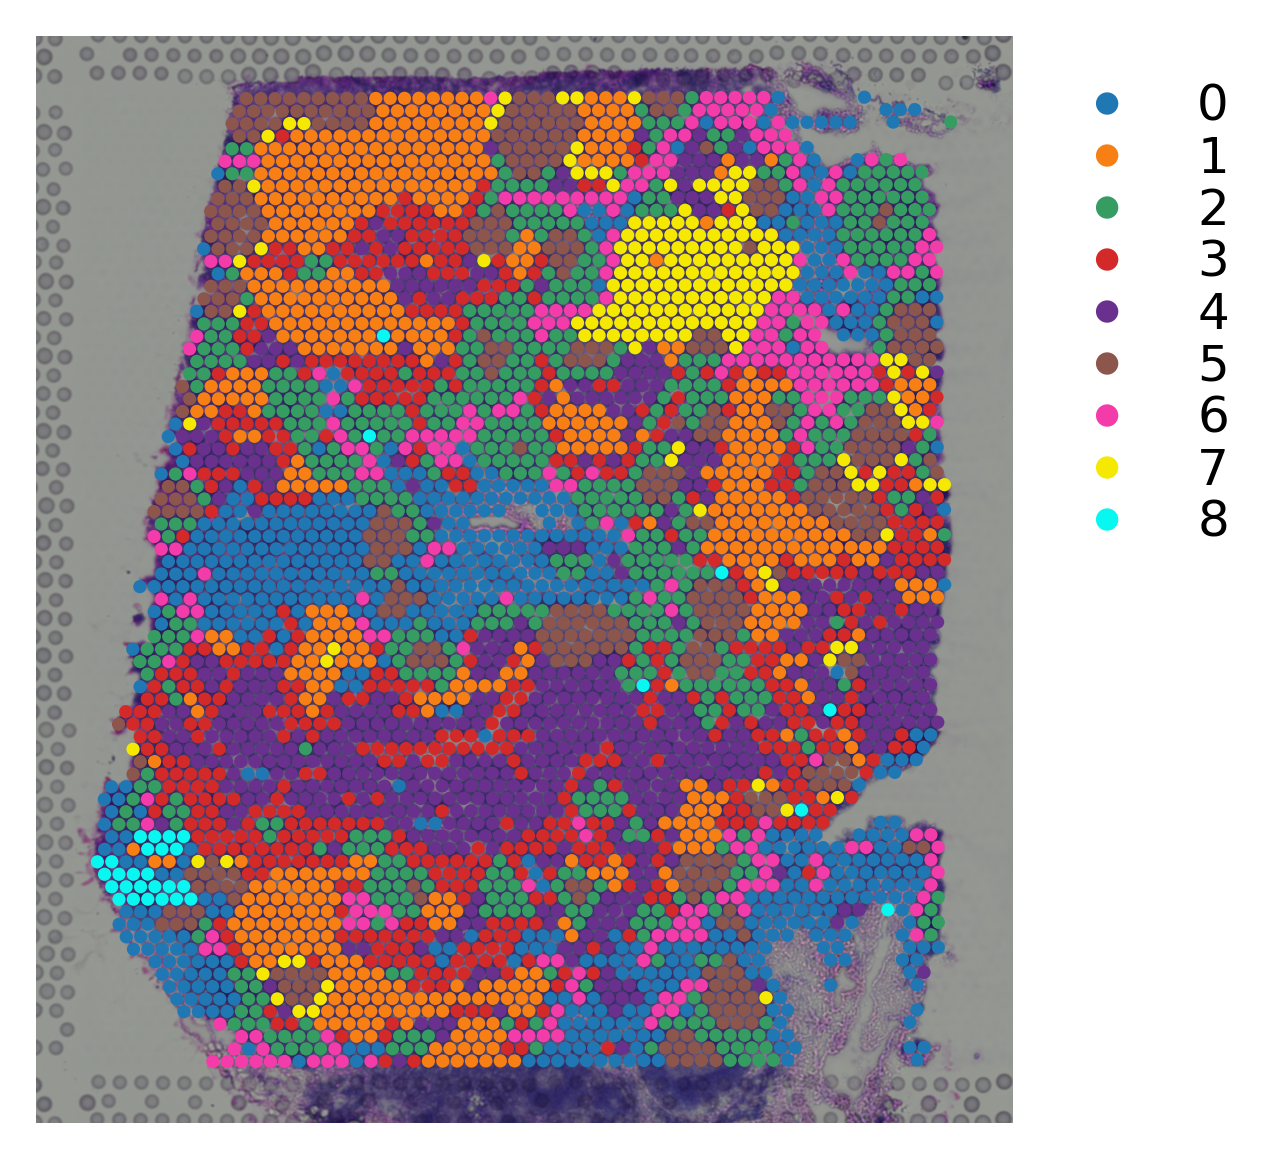

In [37]:
st.pl.cluster_plot(AnnData,use_label="louvain",image_alpha=1,size=7)

## Read Dummy Data

In [17]:
import pandas as pd
import stlearn as st

In [13]:
count_matrix = pd.read_csv('Dummy Data/count_matrix_file.csv', index_col=0)

In [19]:
spatial = pd.read_csv('Dummy Data/spatial.csv')

In [20]:
adata = st.create_stlearn(count=count_matrix,spatial=spatial,library_id="Sample_test", scale=1,background_color="white")

In [21]:
adata

AnnData object with n_obs × n_vars = 30 × 39
    obs: 'imagecol', 'imagerow'
    uns: 'spatial'
    obsm: 'spatial'

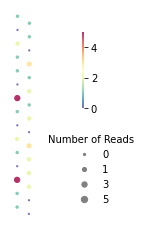

In [22]:
st.pl.QC_plot(adata)

In [30]:
st.pl.gene_plot(adata,gene_symbols="a6")

## Subsample the df of the data matrix

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,36591,36592,36593,36594,36595,36596,36597,36598,36599,36600
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
np_data = df.to_numpy(copy=True)

In [8]:
num_replace = 1000000
indices_x = np.random.randint(0, np_data.shape[0], num_replace)
indices_y = np.random.randint(0, np_data.shape[1], num_replace)
np_data[indices_x, indices_y] = 0.0

In [9]:
df_subsample = pd.DataFrame(np_data)

### Use NMF to factorize matrix

In [15]:
from sklearn.decomposition import NMF

In [17]:
model = NMF(n_components=200, init='random', random_state=0)

In [18]:
W = model.fit_transform(df_subsample)
H = model.components_

In [27]:
print(W.shape, H.shape)

(4035, 200) (200, 36601)


In [24]:
reconstructed_matrix = W @ H

### Use PCA to factorize matrix

In [28]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=200)

In [34]:
pca.fit(df_subsample)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(pca.explained_variance_ratio_)

[8.33473682e-01 7.19951019e-02 2.17381474e-02 1.21157328e-02
 6.73372019e-03 5.28198481e-03 4.76023695e-03 3.49815795e-03
 2.85149808e-03 2.77037849e-03 1.53777772e-03 1.39575545e-03
 1.14467798e-03 7.26614613e-04 6.24619948e-04 5.31223079e-04
 4.47565311e-04 4.07985091e-04 3.75645293e-04 3.07413924e-04
 2.82376597e-04 2.65302049e-04 2.39996225e-04 2.31409373e-04
 2.22446397e-04 2.17627457e-04 2.03363263e-04 2.01815958e-04
 1.96216919e-04 1.93132510e-04 1.89333121e-04 1.82547170e-04
 1.77936614e-04 1.73433335e-04 1.70009080e-04 1.60934083e-04
 1.58135328e-04 1.55046131e-04 1.50107066e-04 1.40957127e-04
 1.38991425e-04 1.36216666e-04 1.33167312e-04 1.31555746e-04
 1.29529508e-04 1.26481551e-04 1.25373073e-04 1.24936050e-04
 1.23602484e-04 1.20955068e-04 1.19829732e-04 1.19321587e-04
 1.13879883e-04 1.12565154e-04 1.11534275e-04 1.09613182e-04
 1.07874504e-04 1.04618375e-04 1.02439328e-04 1.00635552e-04
 9.87144231e-05 9.69708781e-05 9.61235273e-05 9.44871063e-05
 9.37200457e-05 9.193189

In [36]:
print(pca.singular_values_)

[52413.13    15404.43     8464.58     6319.3003   4711.093    4172.4653
  3961.0327   3395.579    3065.7073   3021.786    2251.339    2144.8594
  1942.3872   1547.5554   1434.8353   1323.2217   1214.5695   1159.6216
  1112.7129   1006.59766   964.736     935.1138    889.3984    873.3425
   856.2623    846.93677   818.7106    815.59      804.19684   797.8511
   789.9643    775.6784    765.8202    756.06726   748.56616   728.3132
   721.95245   714.86597   703.3876    681.6127    676.8433    670.05316
   662.5108    658.4898    653.39905   645.6657    642.8302    641.70886
   638.27484   631.40234   628.45825   627.1243    612.65735   609.11053
   606.315     601.0707    596.28455   587.2163    581.0687    575.93024
   570.4065    565.3466    562.87115   558.0594    555.78955   550.4619
   540.1008    539.2376    535.94116   522.3589    521.0429    518.12555
   516.92163   513.59314   510.28287   507.88486   505.63828   500.16495
   498.29742   492.5407    492.06497   490.03513   487.198